In [1]:
from IPython.display import Image
from PIL import Image
import numpy as np
from pandas import DataFrame
import altair as alt
alt.renderers.enable('notebook')
import cairo

In [2]:
width, height = 512, 256

In [3]:
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
c = cairo.Context(surface)
c.set_source_rgb(1, 1, 1)
c.paint()
c.set_source_rgba(0, 0.95, 0.75, 0.5)
c.set_line_width(13)
c.move_to(256, 10)
c.curve_to(200, 55, 500, 230, 256, 240)        
c.stroke()

In [4]:
def convert_to_numpy(surface):
    a = np.array(surface.get_data())
    a = a.reshape(height, width, 4)
    a = np.stack([a[:,:,2], a[:,:,1], a[:,:,0], a[:,:,3]], axis=2)
    return a

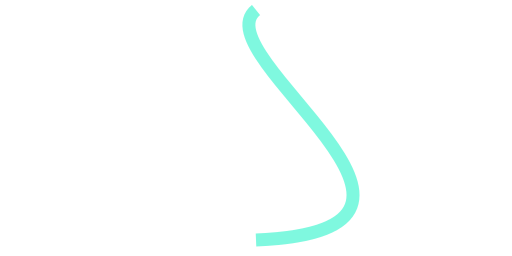

In [5]:
a = convert_to_numpy(surface)
Image.fromarray(a, 'RGBA')

In [6]:
surface.write_to_png("foo.png")

In [11]:
img = Image.open("dataset/without_marker/20191205142548420_0001.jpg")

In [17]:
width, height = img.width, img.height
(width, height)

(1654, 2340)

(2340, 1654, 4)
[ 29  29  29 255]


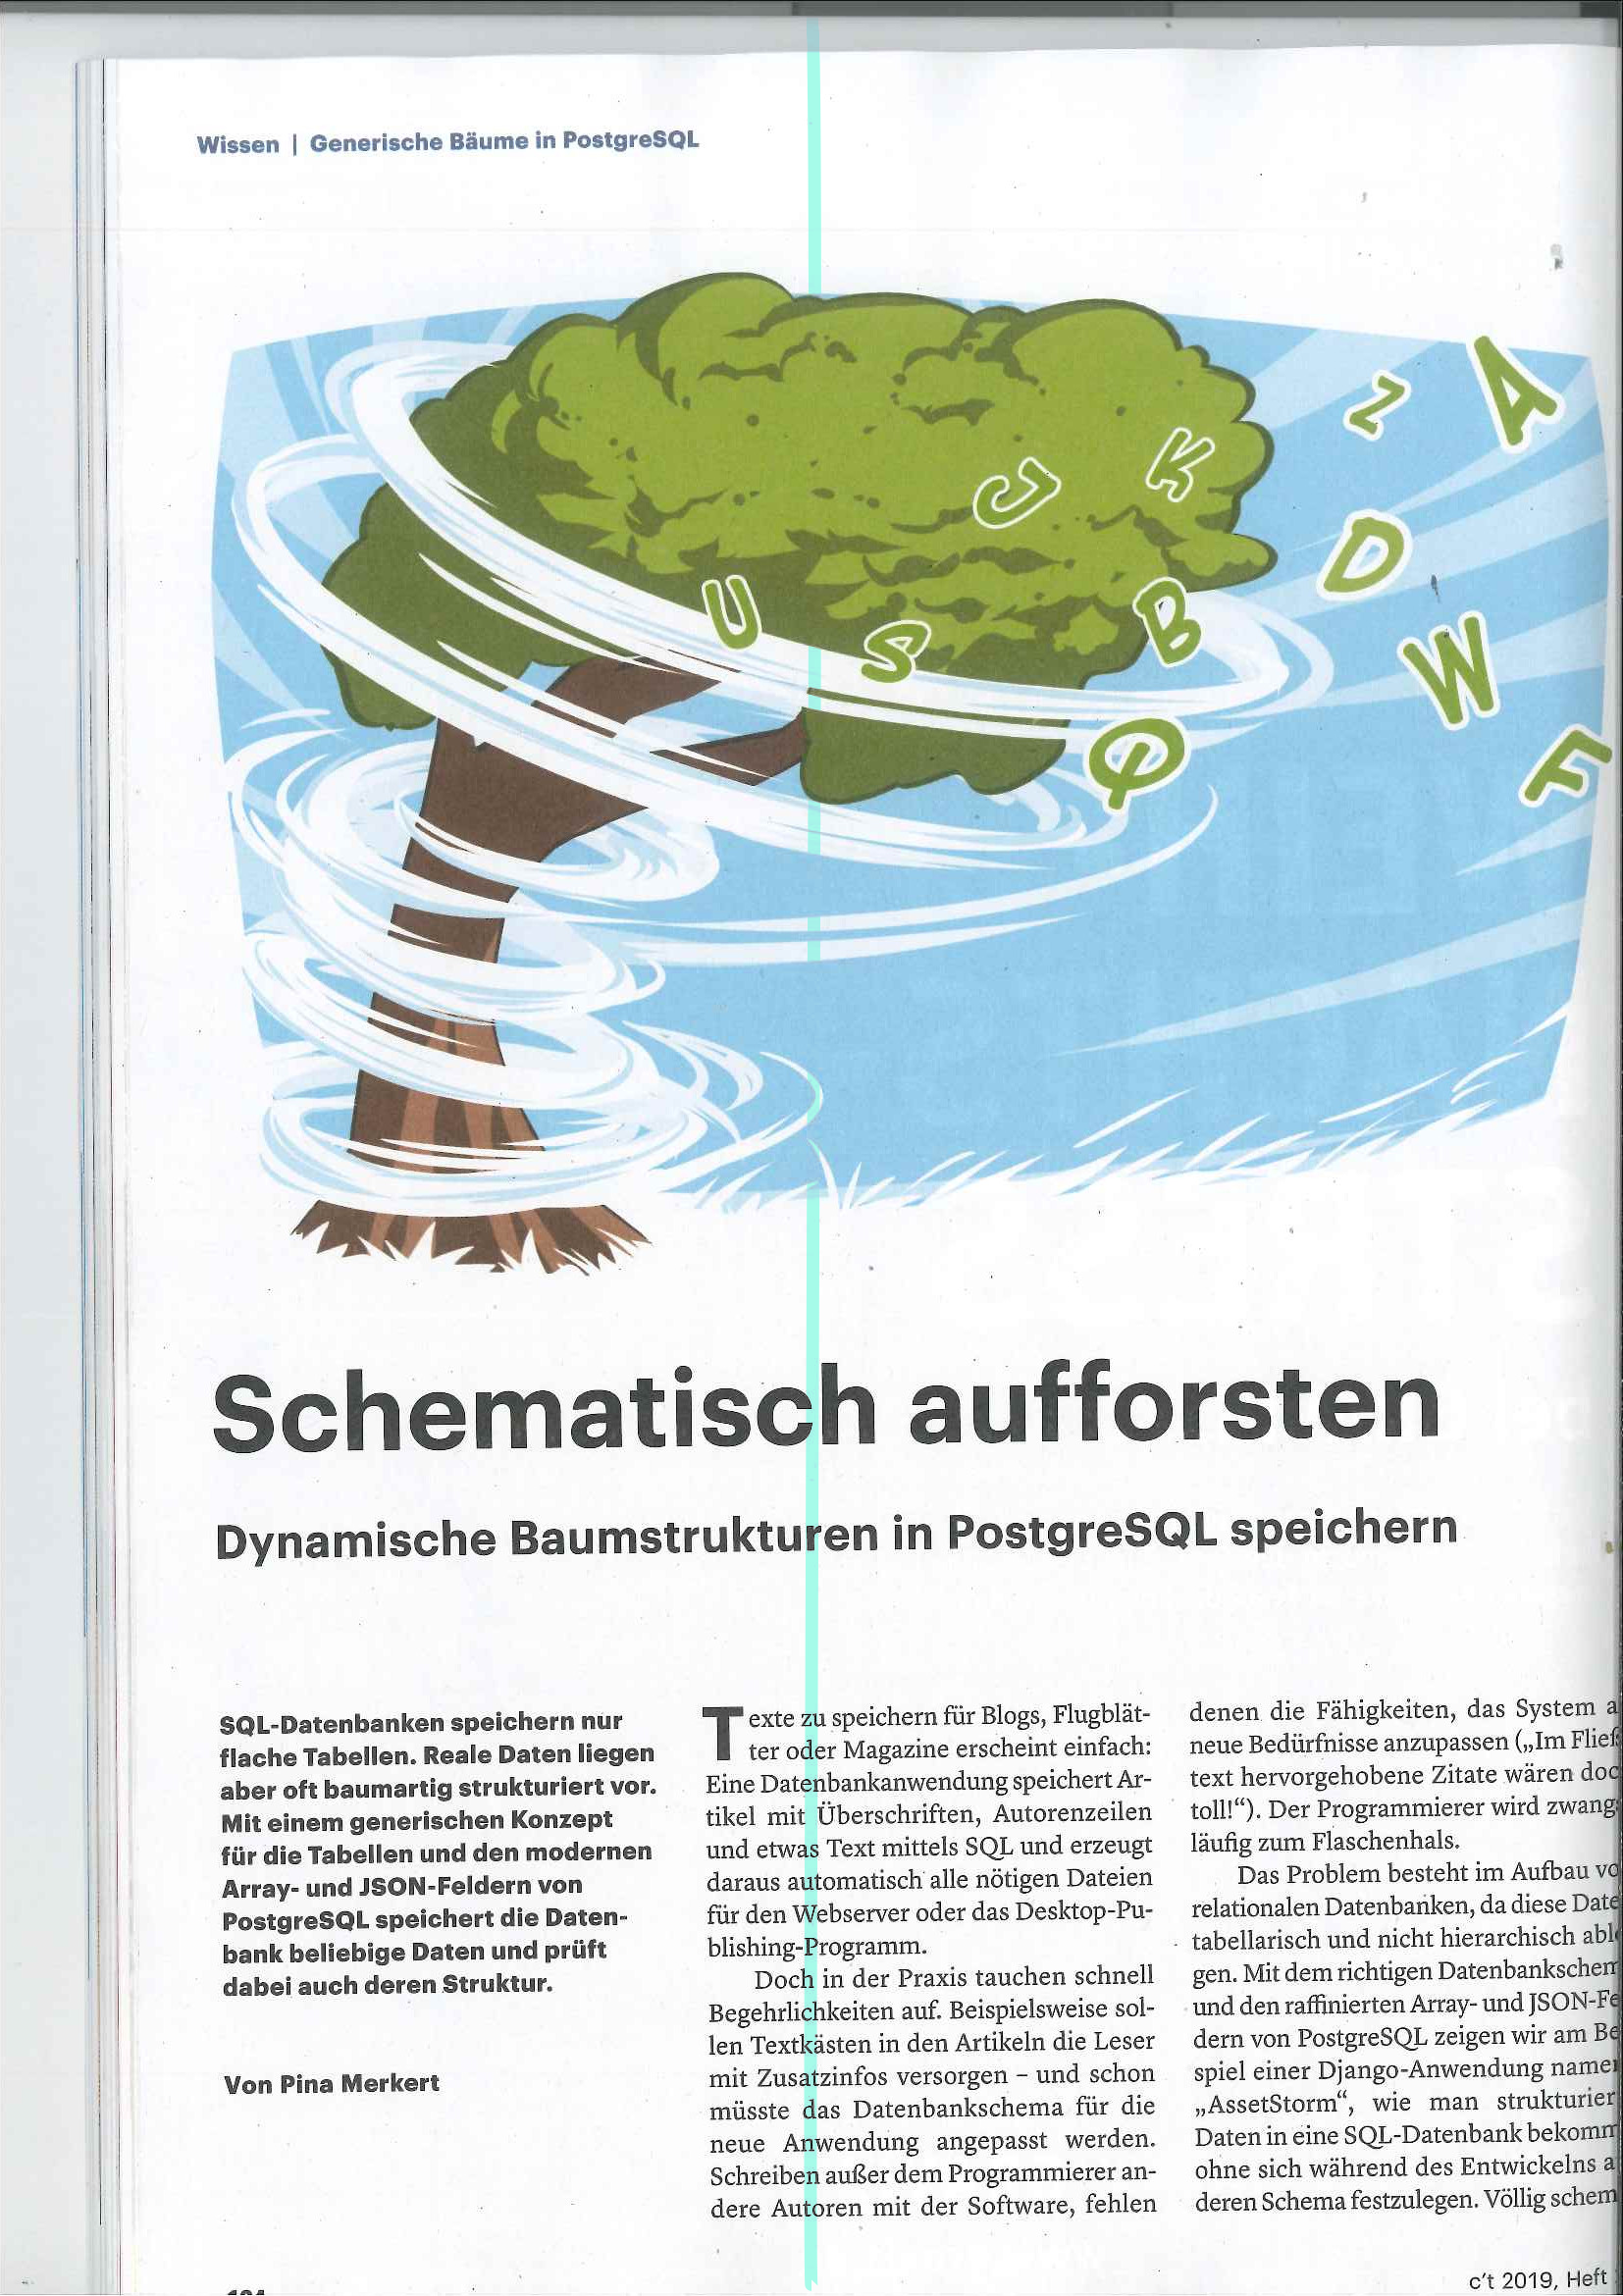

In [43]:
surface2 = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
c = cairo.Context(surface2)
c.set_source_rgb(1, 1, 1)
c.paint()
c.set_source_rgba(0, 0.95, 0.75, 0.35)
c.set_line_width(13)
c.move_to(width/2, 10)
c.curve_to(width/2+10, 15, width/2-5, height-10, width/2, height-10)        
c.stroke()
a = np.concatenate([np.array(img, dtype=np.uint8), np.ones((*a.shape[:2], 1), dtype=np.uint8) * 255], axis=2)
b = convert_to_numpy(surface2)
mix = np.minimum(a, b)
print(mix.shape)
print(mix[0, 0])
Image.fromarray(mix, 'RGBA')